In [1]:
# Drawing of induction curves in Fig.2, Fig. S3 and Fig. S10

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy.stats import halfnorm
# from scipy.statistics import stdev
import os
import seaborn as sns
from scipy.stats import sem
import sys
sns.set()

In [3]:
C_ATC =  [0 ,10 ,20,40 ,60 ,80 ,100 ,150 ,250 ,500 ,750,1000]

### Exemplary induction curves in Fig.2

In [5]:
def fold_change(pref, c,el,gama,K=1):
    numeratorfc = 1 + np.exp(-el-gama)*((c/K)**2)
    denomenatorfc = 1 + np.exp(-el)*((c/K)**2)
    fc = 1/(1+pref*numeratorfc/denomenatorfc)
    return fc

In [23]:
elwt=5.8
WT   = [fold_change(20,c,elwt,4) for c in C_ATC]
s_eL = [fold_change(20,c,4,4) for c in C_ATC]
b_eL = [fold_change(20,c,7.8,4) for c in C_ATC]
bb_eL= [fold_change(20,c,13,4) for c in C_ATC]

s_eD = [fold_change(400,c,elwt,4) for c in C_ATC]
b_eD = [fold_change(6,c,elwt,4) for c in C_ATC]

n_gama = [fold_change(1,c,7,-2.5) for c in C_ATC]
s_gama = [fold_change(20,c,elwt,1.3) for c in C_ATC]
b_gama = [fold_change(20,c,elwt,6) for c in C_ATC]

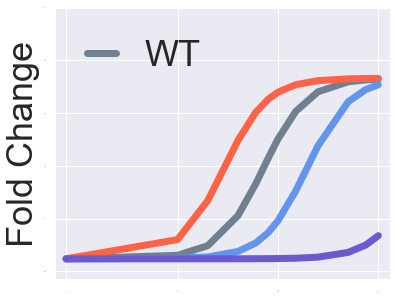

In [24]:
# Fig.2 upper right
yls=0.5
lbsize=36
lgsize=36
ticksize=0
lnwd=7

FCeg_plot = plt.figure(figsize=(6,5))  # Fold-change predict plot
fceg = FCeg_plot.add_subplot(1,1,1)
fceg.plot(C_ATC, WT, label='WT', linewidth=lnwd, color='slategrey')
fceg.plot(C_ATC, s_eL,  linewidth=lnwd, color='tomato')
fceg.plot(C_ATC, b_eL,  linewidth=lnwd, color='cornflowerblue')
fceg.plot(C_ATC, bb_eL,  linewidth=lnwd, color='slateblue')
fceg.tick_params(labelsize=ticksize) # make ticks bigger
fceg.set_ylim([-0.03, 1])
fceg.set_xlim([-1, 1300])
fceg.set_xscale('symlog',linthresh=10)
fceg.set_ylabel('Fold Change', fontsize = lbsize)
fceg.set_xlabel('', fontsize = lbsize)
fceg.legend(fontsize=lgsize,loc='upper left',frameon=False,ncol=1,handlelength=0.8)
# FCeg_plot.savefig('vary el',dpi=300,bbox_inches='tight',pad_inches=0.01)

Text(0.5, 0, '')

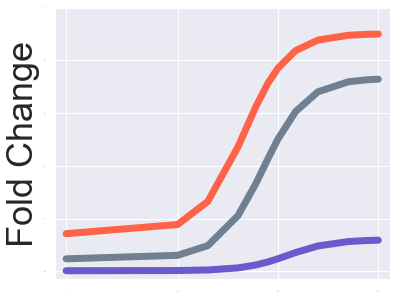

In [25]:
# Fig.2 middle right
FCeg_plot = plt.figure(figsize=(6,5))  # Fold-change predict plot
fceg = FCeg_plot.add_subplot(1,1,1)
fceg.plot(C_ATC, WT, label='WT', linewidth=lnwd, color='slategrey')
fceg.plot(C_ATC, s_eD, label='mutant1', linewidth=lnwd, color='slateblue')
fceg.plot(C_ATC, b_eD, label='mutant2', linewidth=lnwd, color='tomato')

fceg.tick_params(labelsize=ticksize) # make ticks bigger
fceg.set_ylim([-0.03, 1])
fceg.set_xlim([-1, 1300])
fceg.set_xscale('symlog',linthresh=10)
fceg.set_ylabel('Fold Change', fontsize = lbsize)
fceg.set_xlabel('', fontsize = lbsize)
# FCeg_plot.savefig('vary eD',dpi=300,bbox_inches='tight',pad_inches=0.01)

Text(0.5, 0, 'Ligand Concentration')

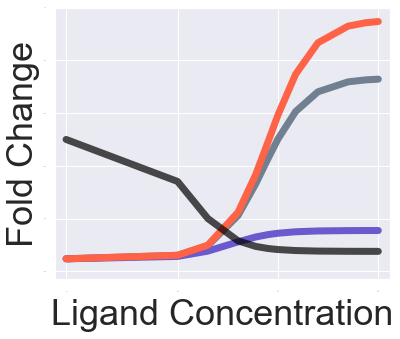

In [26]:
# Fig.2 lower right
FCeg_plot = plt.figure(figsize=(6,5))  # Fold-change predict plot
fceg = FCeg_plot.add_subplot(1,1,1)
fceg.plot(C_ATC, WT, label='WT', linewidth=lnwd, color='slategrey')
fceg.plot(C_ATC, s_gama, label='mutant1', linewidth=lnwd, color='slateblue')
fceg.plot(C_ATC, b_gama, label='mutant2', linewidth=lnwd, color='tomato')
fceg.plot(C_ATC, n_gama, label='mutant2', linewidth=lnwd, color='black',alpha=0.7)
fceg.tick_params(labelsize=ticksize) # make ticks bigger
fceg.set_ylim([-0.03, 1])
fceg.set_xlim([-1, 1300])
fceg.set_xscale('symlog',linthresh=10)
fceg.set_ylabel('Fold Change', fontsize = lbsize)
fceg.set_xlabel('Ligand Concentration', fontsize = lbsize)
# FCeg_plot.savefig('vary gama',dpi=300,bbox_inches='tight',pad_inches=0.01)

### Fig. S3

In [41]:
with open('G102D_FC.txt','r') as g: alllines=g.readlines()[0][2:-2].split('], [')
G102Dfc_read=[]
for each in alllines: G102Dfc_read.append([float(eac) for eac in each.split(',')])

In [42]:
C_ATC_g102d =  [0 ,10 ,20,40 ,60 ,80 ,100 ,150 ,250 ,400 ,750,1000]

In [43]:
B_eL = [fold_change(20,c,20,4) for c in C_ATC]
S_eD = [fold_change(40000,c,elwt,4) for c in C_ATC]
gama0 =[fold_change(20,c,elwt,0) for c in C_ATC]

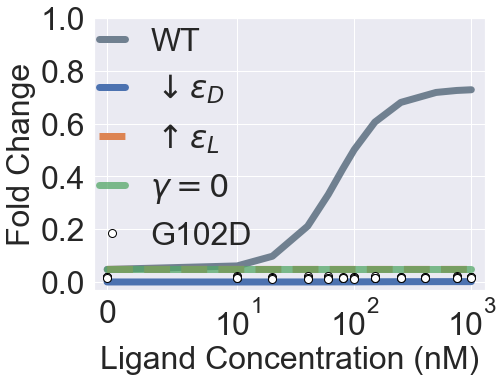

In [46]:
yls=0.5
lbsize=32
lgsize=32
ticksize=32
lnwd=7
yticks=np.arange(-0.,1.01,0.2)

FCeg_plot = plt.figure(figsize=(7,5))  # Fold-change plot
fceg = FCeg_plot.add_subplot(1,1,1)
fceg.plot(C_ATC, WT, label='WT', linewidth=lnwd, color='slategrey')
fceg.plot(C_ATC, S_eD, label='$\downarrow\epsilon_D$', linewidth=lnwd)
fceg.plot(C_ATC, B_eL,'--', label=r'$\uparrow \epsilon_L$', linewidth=lnwd)
fceg.plot(C_ATC, gama0, label='$\gamma=0$', linewidth=lnwd,alpha=0.75)

for m in range(1,4):
    fceg.plot(C_ATC_g102d, G102Dfc_read[m-1],'o', mfc='white',mec='black',mew=1,markersize=8)
fceg.plot(C_ATC_g102d, G102Dfc_read[3],'o', mfc='white',mec='black',mew=1,markersize=8,label='G102D')

fceg.tick_params(labelsize=ticksize) # make ticks bigger
fceg.set_yticks(yticks)
fceg.set_ylim([-0.03, 1])
fceg.set_xlim([-1, 1300])
fceg.set_xscale('symlog',linthresh=10)
fceg.set_ylabel('Fold Change', fontsize = lbsize)
fceg.set_xlabel('Ligand Concentration (nM)', fontsize = lbsize)
fceg.legend(fontsize=lgsize,loc=[-0.02,0.1],frameon=False,ncol=1,handlelength=0.8)
# FCeg_plot.savefig('flatcurv_degnrcy',dpi=300,bbox_inches='tight',pad_inches=0.01)

### Fig. S10

In [47]:
def fold_change(lkns, el, gama,c=1000, K=1):
    pref= 1/lkns -1
    numeratorfc = 1+np.exp(-el-gama)*((c/K)**2)
    denomenatorfc = 1+np.exp(-el)*((c/K)**2)
    
    FC = 1/(1+pref*numeratorfc/denomenatorfc)
    return FC

In [48]:
Post_mutname_full=[ 'Y132A', 'C203V', 'D53H', 'P176N_I174K_F177S',
               'R49G',  'P105M', 'G143M','E150Y', 'Q32A_E147G',      
               'G102D_K98Q', 'G102D_L146A', 'G102D_T26A', 'G102D_H44F_Q47S_Q76K', 'G102D_Y42M_I57N', 
              
               'Y132A_G102D_T26A', 'Y132A_PIF', 'Y132A_R49G', 'Y132A_C203V',
               'C203V_D53H',       'C203V_R49G','C203V_PIF',  'C203V_G102D_L146A', 'WT']
print(len(Post_mutname_full))

23


In [49]:
# experimental leakiness of each mutant and the corresponding sem
with open('leak_info.txt','r') as g: alllines=g.readlines()[0][2:-2]
temp_leakraw, Leakns_read =alllines.split('], ['), []
for each in temp_leakraw:
    tplkr, templ =each.split(','), []
    for eac in tplkr: templ.append(float(eac))
    Leakns_read.append(templ)
print(np.shape(Leakns_read))

(23, 2)


In [50]:
for i in [2,4,5,6]: print(Post_mutname_full[i], Leakns_read[i])

D53H [0.01755627017661114, 0.0007457228226112105]
R49G [0.016671068641013653, 0.00012698394397731884]
P105M [0.0215807553097122, 0.0011805843798559507]
G143M [0.02058172235132797, 0.0006353389682260301]


In [51]:
R49G  = [fold_change(Leakns_read[4][0],8.6,5.3,c) for c in C_ATC]
D53H  = [fold_change(Leakns_read[2][0],5.5,5.3,c) for c in C_ATC]
P105M = [fold_change(Leakns_read[5][0],7.3,5.3,c) for c in C_ATC]
G143M = [fold_change(Leakns_read[6][0],6.9,5.3,c) for c in C_ATC]

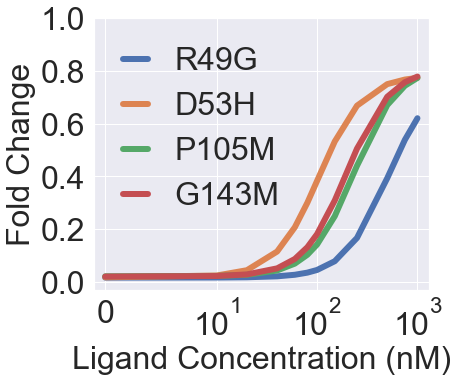

In [64]:
# Fig.S10
lnwd=6
FCeg_plot = plt.figure(figsize=(6,5))  # Fold-change predict plot
fceg = FCeg_plot.add_subplot(1,1,1)
fceg.plot(C_ATC, R49G, label='R49G', linewidth=lnwd)
fceg.plot(C_ATC, D53H, label='D53H', linewidth=lnwd)
fceg.plot(C_ATC, P105M, label='P105M', linewidth=lnwd)
fceg.plot(C_ATC, G143M, label='G143M', linewidth=lnwd)
fceg.tick_params(labelsize=ticksize) # make ticks bigger
fceg.set_yticks(np.arange(0,1.01,0.2))
fceg.set_ylim([-0.03, 1])
fceg.set_xlim([-1, 1300])
fceg.set_xscale('symlog',linthresh=10)
fceg.set_ylabel('Fold Change', fontsize = lbsize)
fceg.set_xlabel('Ligand Concentration (nM)', fontsize = lbsize)
fceg.legend(fontsize=lgsize,loc='upper left',frameon=False,ncol=1, handlelength=0.8)
# FCeg_plot.savefig('New_Figures/FigS10',dpi=300,bbox_inches='tight',pad_inches=0.01)